# Object Recognition using CNN

### Name = Pravek Sharma

### Import Libararies like tensorflow and matplotlib as and when necessary, followed by downloading of the dataset.

In [1]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 7700s 45us/step


In [3]:
print('Training Images: {}'.format(x_train.shape))
print('Testing Images: {}'.format(x_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [4]:
print(x_train[0].shape)

(32, 32, 3)


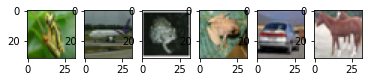

In [5]:
for i in range(232,238):
    plt.subplot(128+1+i)
    img = x_train[i]
    plt.imshow(img)

In [6]:
x_train = x_train.reshape(x_train.shape[0], 32 ,32, 3)
x_test = x_test.reshape(x_test.shape[0], 32 ,32, 3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [7]:
x_train /= 255
x_test /= 255
n_class = 10

In [8]:
print('Shape before one-hot encoding: ',y_train.shape)
y_train = np_utils.to_categorical(y_train, n_class)
y_test = np_utils.to_categorical(y_test, n_class)
print('Shape after one-hot encoding: ',y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


### Building our CNN

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout

In [13]:
model = Sequential()
model.add(Conv2D(50, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(75, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))

### Compiling after adding all the desired and necessary layers

In [14]:
model.compile(loss = 'categorical_crossentropy',
             metrics = ['accuracy'],
             optimizer = 'adam')

In [16]:
model.fit(x_train, y_train, batch_size = 120, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
417/417 [==============================] - 256s 574ms/step - loss: 1.8671 - accuracy: 0.3069 - val_loss: 1.2237 - val_accuracy: 0.5529
Epoch 2/10
417/417 [==============================] - 242s 580ms/step - loss: 1.2215 - accuracy: 0.5635 - val_loss: 1.0015 - val_accuracy: 0.6488
Epoch 3/10
417/417 [==============================] - 242s 582ms/step - loss: 0.9874 - accuracy: 0.6555 - val_loss: 0.8452 - val_accuracy: 0.7094
Epoch 4/10
417/417 [==============================] - 242s 581ms/step - loss: 0.8551 - accuracy: 0.6981 - val_loss: 0.7693 - val_accuracy: 0.7370
Epoch 5/10
417/417 [==============================] - 243s 583ms/step - loss: 0.7492 - accuracy: 0.7395 - val_loss: 0.7429 - val_accuracy: 0.7470
Epoch 6/10
417/417 [==============================] - 243s 582ms/step - loss: 0.6771 - accuracy: 0.7621 - val_loss: 0.7114 - val_accuracy: 0.7548
Epoch 7/10
417/417 [==============================] - 242s 581ms/step - loss: 0.6265 - accuracy: 0.7793 - val_loss: 0.6978 -

In [18]:
classes = range(0,10)
names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']
class_labels = dict(zip(classes,names))
batch = x_test[100:109]
labels = np.argmax(y_test[100:109],axis = -1)
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 1s 700ms/step


### Predictions

In [19]:
predictions

array([[1.35209979e-04, 8.20114565e-06, 2.61942409e-02, 2.83696223e-02,
        7.48230219e-01, 1.07410975e-01, 4.16500075e-03, 8.53576139e-02,
        5.30938050e-05, 7.57830203e-05],
       [1.47015657e-04, 5.95125312e-05, 2.62743682e-02, 1.47176400e-01,
        1.09012209e-01, 4.06703860e-01, 1.30813241e-01, 1.78910032e-01,
        6.65714033e-05, 8.36848747e-04],
       [3.64382771e-07, 2.52969755e-07, 1.94421926e-04, 5.46702184e-04,
        4.09472705e-06, 3.21538624e-04, 9.98931348e-01, 7.62788659e-07,
        4.01483646e-07, 1.75704518e-08],
       [1.44527939e-05, 6.89275794e-06, 7.02825328e-03, 8.05300057e-01,
        3.93959694e-02, 4.90405113e-02, 9.46073532e-02, 3.99853522e-03,
        4.00395948e-05, 5.67880576e-04],
       [1.41968470e-09, 9.99979377e-01, 1.57565231e-13, 3.85813648e-14,
        1.57517669e-14, 3.19846925e-15, 3.80103223e-14, 1.32796015e-15,
        2.57950177e-07, 2.03792843e-05],
       [9.34509274e-07, 9.99307156e-01, 1.35968281e-09, 4.18079926e-09,
   

In [20]:
for image in predictions:
    print(np.sum(image))

0.99999994
1.0
0.9999999
0.99999994
1.0
1.0
1.0
0.99999994
1.0


In [21]:
class_result = np.argmax(predictions, axis = -1)

In [22]:
class_result

array([4, 5, 6, 3, 1, 1, 3, 6, 8], dtype=int64)

### Visual representation of the predictions against the actual values

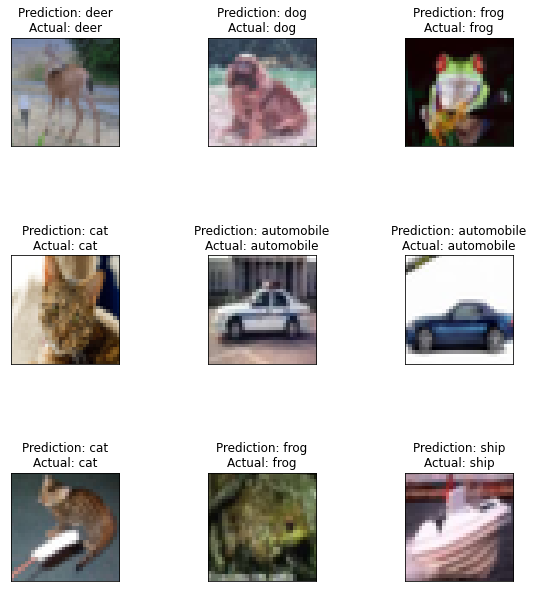

In [27]:
fig, axs = plt.subplots(3,3,figsize = (10,10))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
    axs[i].imshow(img)
plt.show()